# Daten importieren
*Datenquelle: [https://www.kaggle.com/datasets/thedevastator/u-s-software-developer-salaries](https://www.kaggle.com/datasets/thedevastator/u-s-software-developer-salaries)*

In [ ]:
import pandas as pd

df = pd.read_csv("swe_salary.csv")
df

,Median Home Price,Cost of Living avg,Rent avg,Local Purchasing Power avg,Number of Software Developer Jobs,Software Developer Salary avg
0,192000.0,984.8,1421.5,9335.4,13430.0,108500.0
1,491600.0,1250.7,2528.2,8971.3,65760.0,131167.0
2,208500.0,989.9,1974.5,8939.8,12800.0,107046.0
3,296500.0,1049.2,1594.0,8493.1,5780.0,111670.0
4,124100.0,961.2,1072.1,4887.7,4240.0,99338.0
...,...,...,...,...,...,...
72,146500.0,1065.5,1355.1,7732.9,8220.0,80314.0
73,283400.0,1102.1,2494.4,5782.4,13740.0,95662.0
74,283400.0,1086.0,2171.9,6252.0,13740.0,95662.0
75,293900.0,984.0,1448.0,5443.0,1220.0,84021.0


In [ ]:
df.describe()

,Median Home Price,Cost of Living avg,Rent avg,Local Purchasing Power avg,Number of Software Developer Jobs,Software Developer Salary avg
count,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000
mean,3.127013e+05,1414.057143,3280.429870,7421.228571,19098.571429,101866.207792
std,2.227433e+05,2369.540953,9118.805313,1327.443694,23858.147274,13926.636588
min,1.241000e+05,832.500000,879.300000,4840.100000,1120.000000,80314.000000
25%,1.784000e+05,957.300000,1340.500000,6464.200000,3170.000000,91976.000000
50%,2.437000e+05,995.000000,1625.800000,7499.000000,8770.000000,100614.000000
75%,3.660000e+05,1086.000000,2171.900000,8153.100000,21160.000000,109503.000000
max,1.193600e+06,15809.200000,58597.600000,10673.700000,98650.000000,142101.000000


# Daten aufteilen

In [ ]:
X = df.copy()
y = X.pop("Software Developer Salary avg")

In [ ]:
y

0     108500.0
1     131167.0
2     107046.0
3     111670.0
4      99338.0
        ...   
72     80314.0
73     95662.0
74     95662.0
75     84021.0
76     90796.0
Name: Software Developer Salary avg, Length: 77, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

In [ ]:
X_test

,Median Home Price,Cost of Living avg,Rent avg,Local Purchasing Power avg,Number of Software Developer Jobs
48,162200.0,998.7,1407.3,6790.6,28450.0
74,283400.0,1086.0,2171.9,6252.0,13740.0
59,146600.0,1011.2,1118.6,6177.9,4950.0
54,166800.0,948.6,1387.0,7499.0,8470.0
34,465000.0,1207.6,3005.1,7140.5,54140.0
26,397400.0,1085.5,2031.7,6669.7,15420.0
68,199500.0,896.4,1302.1,7555.2,1770.0
33,649500.0,987.2,2194.1,6789.4,53190.0
45,225900.0,1088.8,2198.4,8346.2,42090.0
69,243200.0,962.3,1347.4,6933.2,1120.0


# Modell trainieren und bewerten

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model = DecisionTreeRegressor(max_depth=5, random_state=0)
model.fit(X_train, y_train)
y_predict = model.predict(X_valid)
mae = mean_absolute_error(y_predict, y_valid)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 9069.761904761905


# Bewertungsfunktion definieren

In [ ]:
def get_mae(X_train, y_train, X_valid, y_valid, max_depth):
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_predict)
    return mae

for max_depth in [3, 4, 5, 6, 7, 8]:
    valid_error = get_mae(X_train, y_train, X_valid, y_valid, max_depth)
    print(f"Max Depth: {max_depth}, Valid Error: {valid_error}")

Max Depth: 3, Valid Error: 8769.159507159506
Max Depth: 4, Valid Error: 8590.9304029304
Max Depth: 5, Valid Error: 9069.761904761905
Max Depth: 6, Valid Error: 9013.015384615384
Max Depth: 7, Valid Error: 9271.653846153848
Max Depth: 8, Valid Error: 9772.5


In [ ]:
train_errors = []
valid_errors = []

for max_depth in [3, 4, 5, 6, 7, 8]:
    train_error = get_mae(X_train, y_train, X_train, y_train, max_depth)
    valid_error = get_mae(X_train, y_train, X_valid, y_valid, max_depth)
    train_errors.append(train_error)
    valid_errors.append(valid_error)

errors_df = pd.DataFrame({
    "Train Error": train_errors,
    "Valid Error": valid_errors,
}, index=[3, 4, 5, 6, 7, 8])
errors_df

,Train Error,Valid Error
3,4038.664412,8769.159507
4,2730.571429,8590.930403
5,1798.037698,9069.761905
6,848.141667,9013.015385
7,339.161111,9271.653846
8,132.854167,9772.500000


# Trainings- und Validierungsfehler visualisieren

Text(0.5, 0, 'Max Depth')

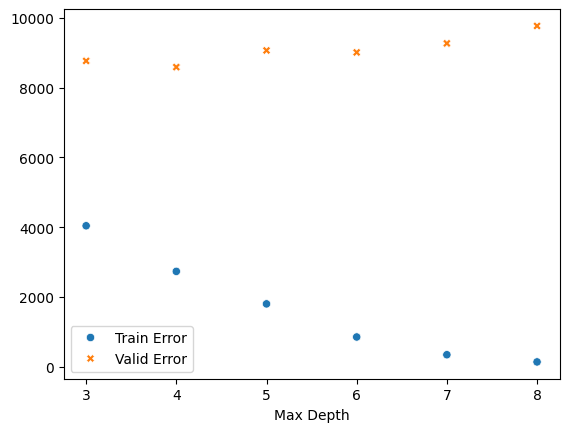

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(errors_df)
plt.xlabel("Max Depth")

# Kreuzvalidierung

In [ ]:
from sklearn.model_selection import cross_val_score

cv_model = DecisionTreeRegressor(max_depth=3, random_state=0)
cross_val_scores = cross_val_score(cv_model, X_temp, y_temp, cv=4, scoring="neg_mean_absolute_error")

print("Cross-Validation Scores: ", cross_val_scores)

Cross-Validation Scores:  [-9202.9286859 -8466.475     -9941.7003367 -5341.7047619]


In [ ]:
positive_scores = -1 * cross_val_scores
positive_scores

array([9202.9286859, 8466.475    , 9941.7003367, 5341.7047619])

In [ ]:
print("Mean MAE: ", positive_scores.mean())

Mean MAE:  8238.202196125634


# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_cv_model = DecisionTreeRegressor(random_state=0)
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8]
}

grid_search = GridSearchCV(grid_cv_model, param_grid, cv=4, scoring='neg_mean_absolute_error')
grid_search.fit(X_temp, y_temp)

print("Best Mean Absolute Error: ", -grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

Best Mean Absolute Error:  7297.998942139356
Best Parameters:  {'max_depth': 4}


# Finales Modell

In [ ]:
final_model = grid_search.best_estimator_
y_predict_final = final_model.predict(X_test)
mae = mean_absolute_error(y_predict_final, y_test)

print("Final MAE:", mae)

Final MAE: 3690.0818181818177


# Andere Metrik: Mean Squared Error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_predict_final, y_test)

print("Final MSE:", mse)

Final MSE: 32048961.812043153


# Andere Metrik: Root Mean Squared Error (RMSE)

In [ ]:
rmse = mean_squared_error(y_predict_final, y_test, squared=False)

print("Final MSE:", rmse)

Final MSE: 5661.18024903316
